In [177]:
import numpy as np 
import pandas as pd 
import os 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [178]:
os.chdir ('C:\\Users\\infip\\OneDrive\\Documents\\PY Projects\\PRJ Stock Price Prediction\\')

In [179]:
df =pd.read_csv("prices.csv", header=0)
display (df)


,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30 00:00:00,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


In [180]:
print(df.shape)

(851264, 7)


In [181]:
print(df.columns)

Index(['date', 'symbol', 'open', 'close', 'low', 'high', 'volume'], dtype='object')


In [182]:
df.symbol.value_counts()

KSU     1762
NOC     1762
ORCL    1762
OMC     1762
OKE     1762
        ... 
KHC      378
HPE      304
CSRA     284
WLTW     251
FTV      126
Name: symbol, Length: 501, dtype: int64

In [183]:
df.symbol.unique()

array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET',
       'AFL', 'AGN', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALK', 'ALL',
       'ALXN', 'AMAT', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'AN',
       'ANTM', 'AON', 'APA', 'APC', 'APD', 'APH', 'ARNC', 'ATVI', 'AVB',
       'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX',
       'BBBY', 'BBT', 'BBY', 'BCR', 'BDX', 'BEN', 'BHI', 'BIIB', 'BK',
       'BLK', 'BLL', 'BMY', 'BSX', 'BWA', 'BXP', 'C', 'CA', 'CAG', 'CAH',
       'CAT', 'CB', 'CBG', 'CBS', 'CCI', 'CCL', 'CELG', 'CERN', 'CF',
       'CHD', 'CHK', 'CHRW', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA',
       'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COH',
       'COL', 'COO', 'COP', 'COST', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS',
       'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DD', 'DE',
       'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 

In [184]:
display(df.symbol.unique().shape)

(501,)

In [185]:
df.symbol.unique()[0:20]

array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET',
       'AFL', 'AGN'], dtype=object)

In [186]:
print(len(df.symbol.values))

851264


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


In [188]:
df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,70.836986,70.857109,70.118414,71.543476,5.415113e+06
std,83.695876,83.689686,82.877294,84.465504,1.249468e+07
min,0.850000,0.860000,0.830000,0.880000,0.000000e+00
25%,33.840000,33.849998,33.480000,34.189999,1.221500e+06
50%,52.770000,52.799999,52.230000,53.310001,2.476250e+06
75%,79.879997,79.889999,79.110001,80.610001,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [189]:
df.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [190]:
df.date.unique()

array(['2016-01-05 00:00:00', '2016-01-06 00:00:00',
       '2016-01-07 00:00:00', ..., '2016-12-28', '2016-12-29',
       '2016-12-30'], dtype=object)

In [191]:
pd.DataFrame(df.date.unique())

,0
0,2016-01-05 00:00:00
1,2016-01-06 00:00:00
2,2016-01-07 00:00:00
3,2016-01-08 00:00:00
4,2016-01-11 00:00:00
...,...
3519,2016-12-23
3520,2016-12-27
3521,2016-12-28
3522,2016-12-29


In [192]:
df.duplicated().sum()

0

In [193]:
#Calling the file in nyse named securities.csv, It has the company details 
comp_info = pd.read_csv('securities.csv')
comp_info


,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",31-03-1964,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",31-12-2012,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",06-07-2011,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",31-08-2015,718877
...,...,...,...,...,...,...,...,...
500,YHOO,Yahoo Inc.,reports,Information Technology,Internet Software & Services,"Sunnyvale, California",NaN,1011006
501,YUM,Yum! Brands Inc,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",06-10-1997,1041061
502,ZBH,Zimmer Biomet Holdings,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",NaN,1136869
503,ZION,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",NaN,109380


In [194]:
comp_info["Ticker symbol"].unique()

array(['MMM', 'ABT', 'ABBV', 'ACN', 'ATVI', 'AYI', 'ADBE', 'AAP', 'AES',
       'AET', 'AMG', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ALXN',
       'ALLE', 'AGN', 'ADS', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN',
       'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC',
       'AME', 'AMGN', 'APH', 'APC', 'ADI', 'ANTM', 'AON', 'APA', 'AIV',
       'AAPL', 'AMAT', 'ADM', 'ARNC', 'AJG', 'AIZ', 'T', 'ADSK', 'ADP',
       'AN', 'AZO', 'AVB', 'AVY', 'BHI', 'BLL', 'BAC', 'BCR', 'BAX',
       'BBT', 'BDX', 'BBBY', 'BRK.B', 'BBY', 'BIIB', 'BLK', 'HRB', 'BA',
       'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BF.B', 'CHRW', 'CA', 'COG',
       'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CAT', 'CBG', 'CBS', 'CELG',
       'CNC', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHTR', 'CHK', 'CVX',
       'CMG', 'CB', 'CHD', 'CI', 'XEC', 'CINF', 'CTAS', 'CSCO', 'C',
       'CFG', 'CTXS', 'CME', 'CMS', 'COH', 'KO', 'CTSH', 'CL', 'CMCSA',
       'CMA', 'CAG', 'CXO', 'COP', 'ED', 'STZ', 'GLW', 'COST', 'COTY',


In [195]:

con_names = comp_info["Security"].unique()
for x in con_names:
    print(x)

3M Company
Abbott Laboratories
AbbVie
Accenture plc
Activision Blizzard
Acuity Brands Inc
Adobe Systems Inc
Advance Auto Parts
AES Corp
Aetna Inc
Affiliated Managers Group Inc
AFLAC Inc
Agilent Technologies Inc
Air Products & Chemicals Inc
Akamai Technologies Inc
Alaska Air Group Inc
Albemarle Corp
Alexion Pharmaceuticals
Allegion
Allergan, Plc
Alliance Data Systems
Alliant Energy Corp
Allstate Corp
Alphabet Inc Class A
Alphabet Inc Class C
Altria Group Inc
Amazon.com Inc
Ameren Corp
American Airlines Group
American Electric Power
American Express Co
American International Group, Inc.
American Tower Corp A
American Water Works Company Inc
Ameriprise Financial
AmerisourceBergen Corp
AMETEK Inc
Amgen Inc
Amphenol Corp
Anadarko Petroleum Corp
Analog Devices, Inc.
Anthem Inc.
Aon plc
Apache Corporation
Apartment Investment & Mgmt
Apple Inc.
Applied Materials Inc
Archer-Daniels-Midland Co
Arconic Inc
Arthur J. Gallagher & Co.
Assurant Inc
AT&T Inc
Autodesk Inc
Automatic Data Processing
Auto

In [196]:
comp_info["Ticker symbol"].nunique()

505

In [197]:
comp_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Ticker symbol            505 non-null    object
 1   Security                 505 non-null    object
 2   SEC filings              505 non-null    object
 3   GICS Sector              505 non-null    object
 4   GICS Sub Industry        505 non-null    object
 5   Address of Headquarters  505 non-null    object
 6   Date first added         307 non-null    object
 7   CIK                      505 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 31.7+ KB


In [198]:
comp_info.isnull().sum()

Ticker symbol                0
Security                     0
SEC filings                  0
GICS Sector                  0
GICS Sub Industry            0
Address of Headquarters      0
Date first added           198
CIK                          0
dtype: int64

In [199]:
comp_info.describe()

,CIK
count,5.050000e+02
mean,7.074490e+05
std,5.144375e+05
min,1.800000e+03
25%,8.631200e+04
50%,8.310010e+05
75%,1.075531e+06
max,1.659166e+06


In [200]:
comp_info.loc[comp_info.Security.str.startswith('Face') , :]

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
181,FB,Facebook,reports,Information Technology,Internet Software & Services,"Menlo Park, California",23-12-2013,1326801


In [201]:
comp_info.loc[comp_info.Security.str.startswith('Acc') , :]

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",06-07-2011,1467373


In [202]:
comp_plot = comp_info.loc[(comp_info["Security"] == 'Yahoo Inc.') | 
                          (comp_info["Security"] == 'Xerox Corp.') | 
                          (comp_info["Security"] == 'Adobe Systems Inc')|
                          (comp_info["Security"] == 'Microsoft Corp.') | 
                          (comp_info["Security"] == 'Adobe Systems Inc')| 
                          (comp_info["Security"] == 'Facebook') | 
                          (comp_info["Security"] == 'Goldman Sachs Group')|
                          (comp_info["Security"] == 'Amazon.com Inc')|
                          (comp_info["Security"] == 'Apple Inc.')|
                          (comp_info["Security"] == 'Cisco Systems')|
                          (comp_info["Security"] == 'Nike'), ["Ticker symbol"] ]["Ticker symbol"] 
print(comp_plot)

6      ADBE
26     AMZN
45     AAPL
106    CSCO
181      FB
212      GS
306    MSFT
330     NKE
496     XRX
500    YHOO
Name: Ticker symbol, dtype: object


In [203]:
for i in comp_plot:
    print (i)


ADBE
AMZN
AAPL
CSCO
FB
GS
MSFT
NKE
XRX
YHOO


In [204]:
def plotter(code):
    # Function used to create graphs for 6 companies 
    global closing_stock ,opening_stock
    #creating plot of all 6 company for opening and closing stock  total 12 graphs
    # Below statement create 2X2 empty chart 
    f, axs = plt.subplots(2,2,figsize=(15,8))
    # total 12 graphs
    # creating plot opening prize of particular company
    plt.subplot(212)
    #taking name of the company as code, get all records related to one company
    company = df[df['symbol']==code]
    #taking the values of one company and taking its open column values to 1D array
    company = company.open.values.astype('float32')
    #reshaping the open stock value from 1D  to 2D .
    company = company.reshape(-1, 1)
    # putting the value of company in opening_stock 
    opening_stock = company
    # plotting the data with green graph between "Time" and "prices vs time"
    
    plt.grid(True)# enalbling the grid in graph
    plt.xlabel('Time') # setting X axis as time
    # setting Y axis as company name + open stock prices
    plt.ylabel(code + " open stock prices") 
    plt.title('prices Vs Time') # setting title
    plt.plot(company , 'g') # calling the graph with green graph line
    
    # creating plot closing prize of particular company
    plt.subplot(211)
    #taking name of the company as code
    company_close = df[df['symbol']==code]
    #taking the values of one company and taking its close column values
    company_close = company_close.close.values.astype('float32')
    #reshaping the open column value in 1D and calling it closing_stock
   # -1 for unknown dimension
    company_close = company_close.reshape(-1, 1)
    # putting company_close value in closing_stock 
    closing_stock = company_close
    # plotting the data graph between "Time" and "prices vs time"
    plt.xlabel('Time') # setting x axis as time
    plt.ylabel(code + " close stock prices")# setting y axis as company name + open stock prices
    plt.title('prices Vs Time') # setting title as price vs time
    plt.grid(True) # enabling the grid in graph
    plt.plot(company_close , 'b') #creating the data graph in blue graph line
    plt.show() # calling the graph



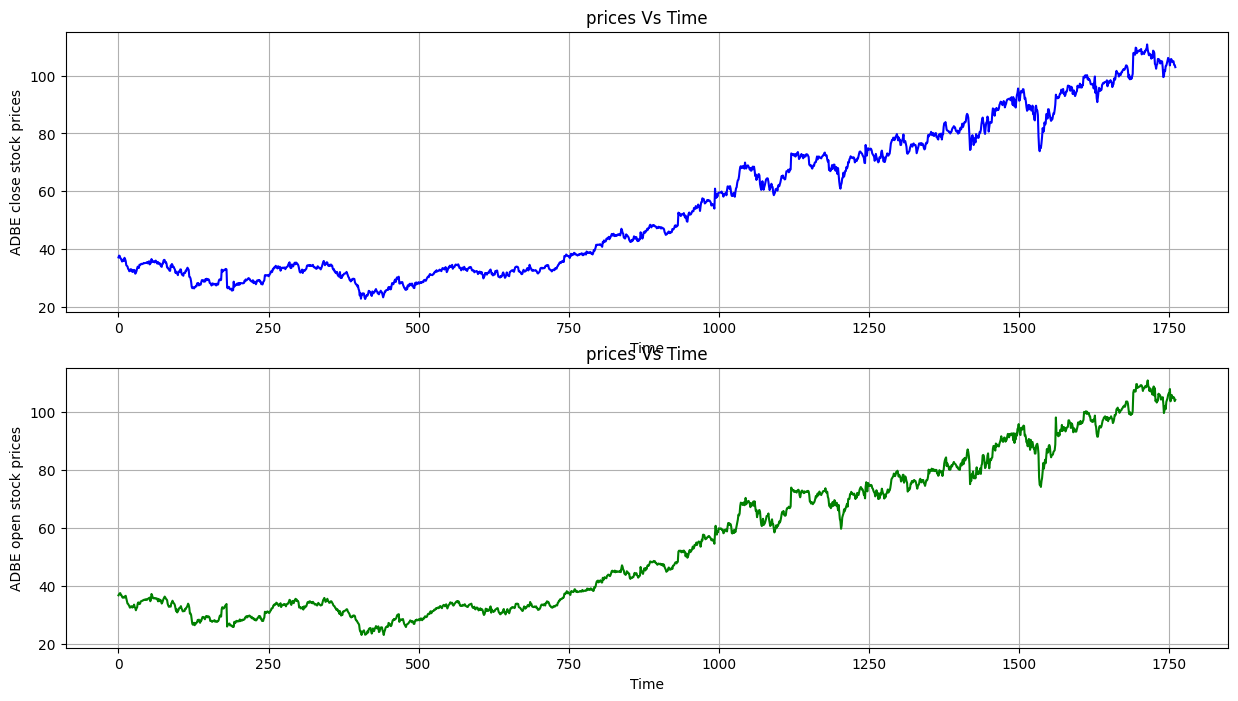

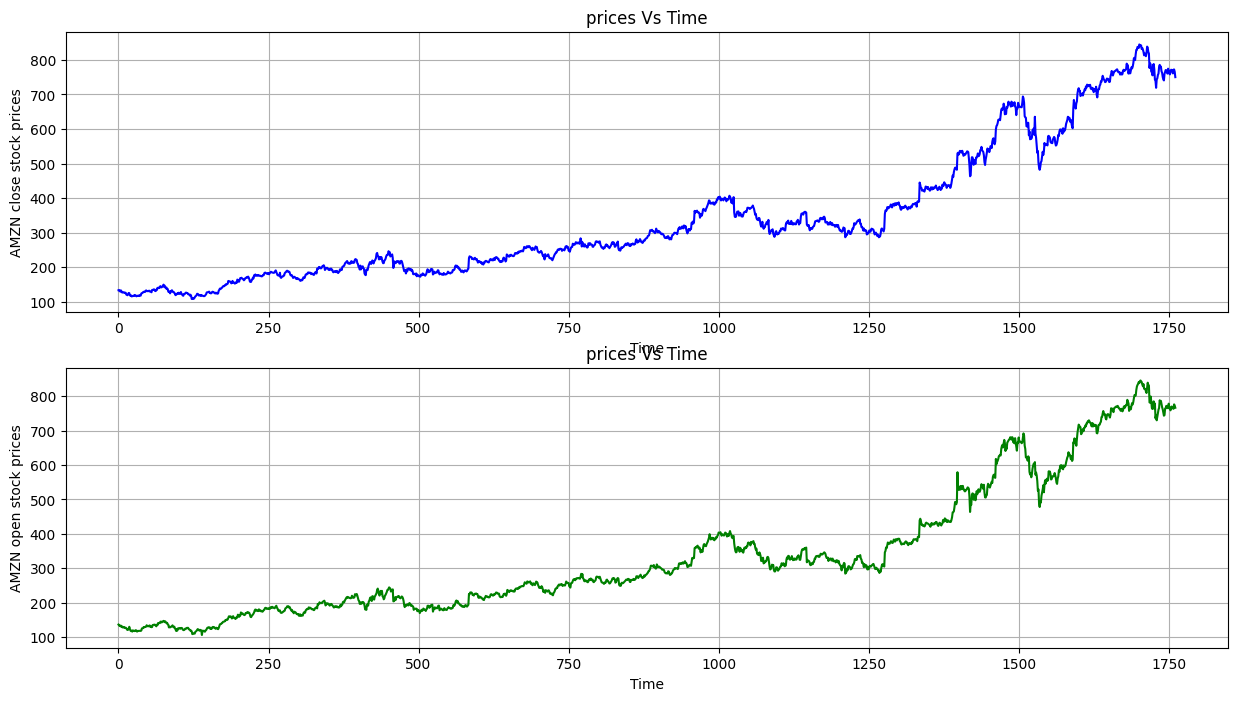

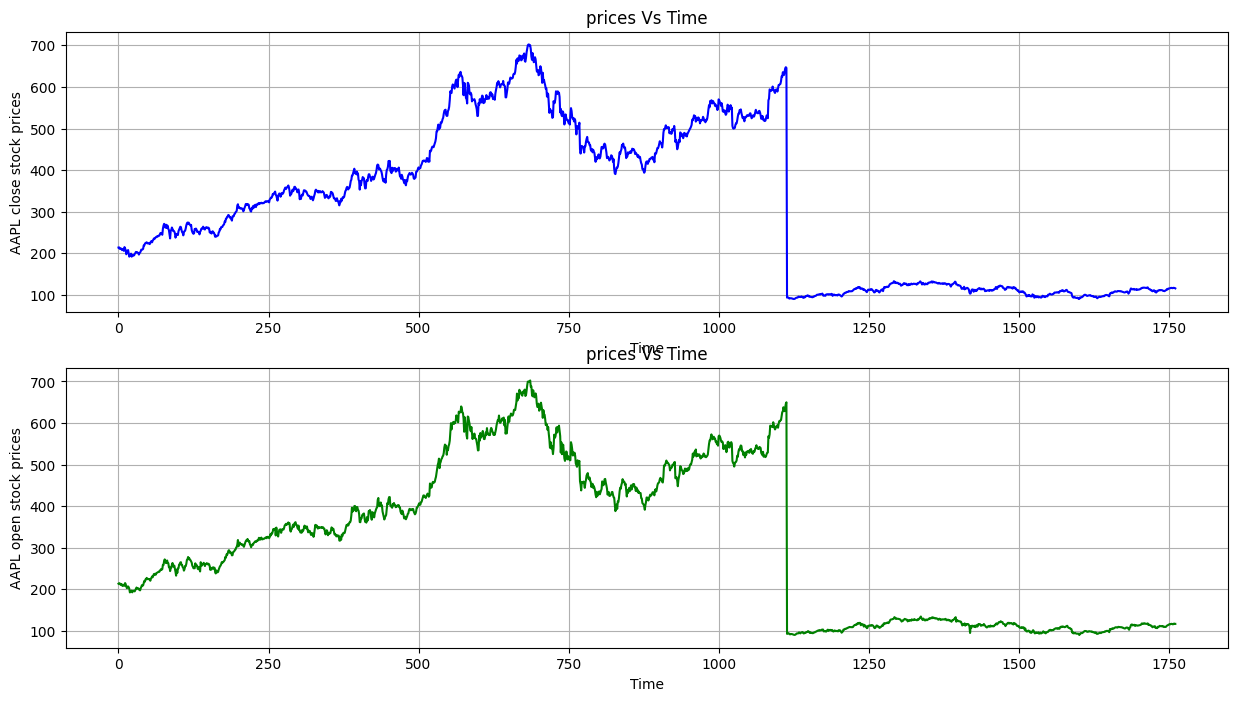

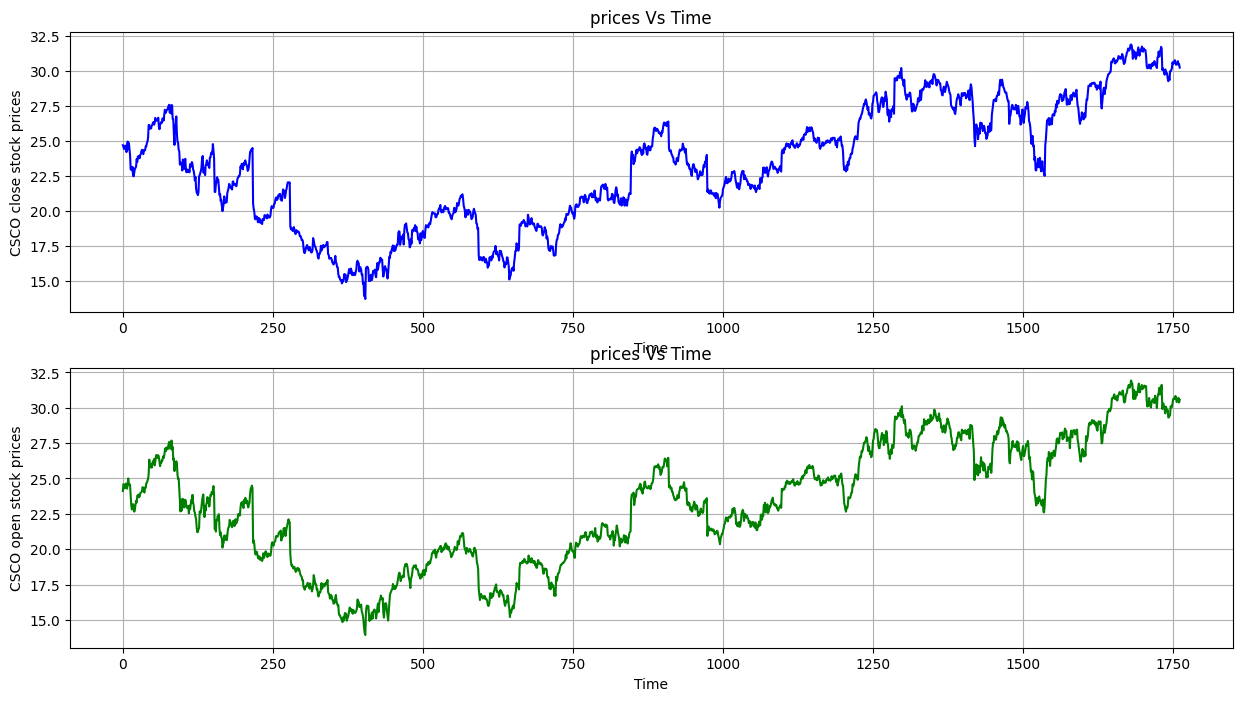

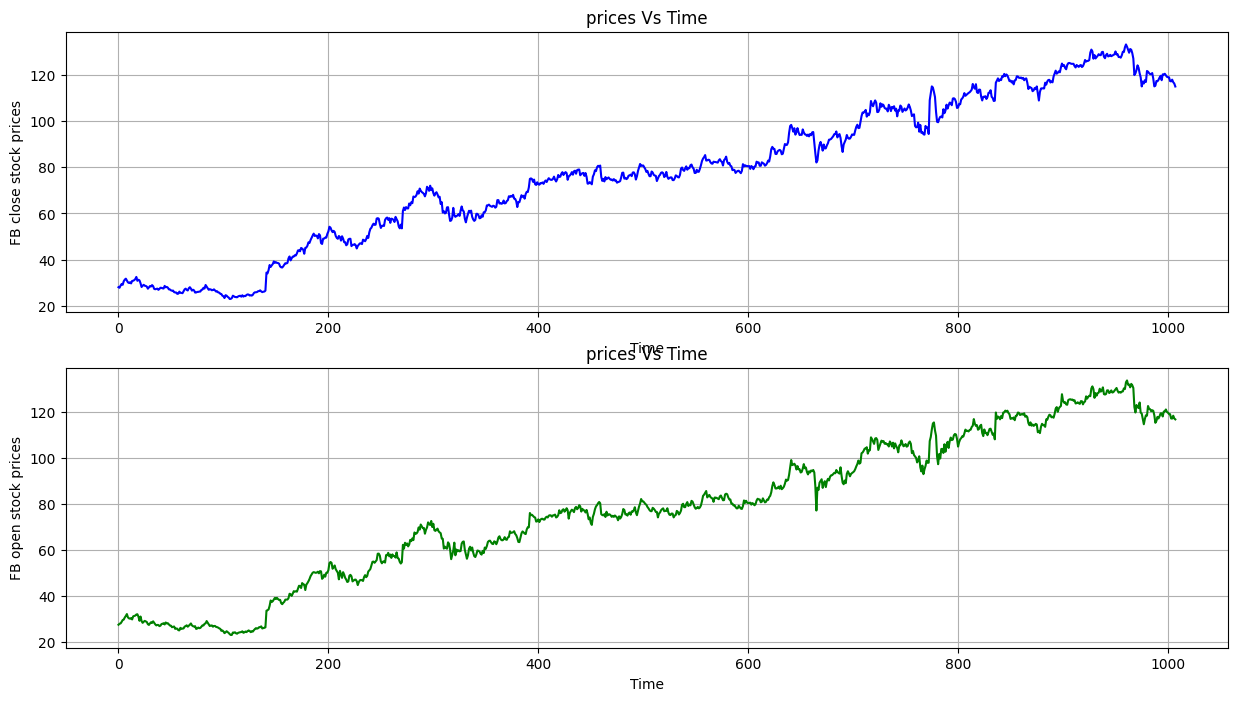

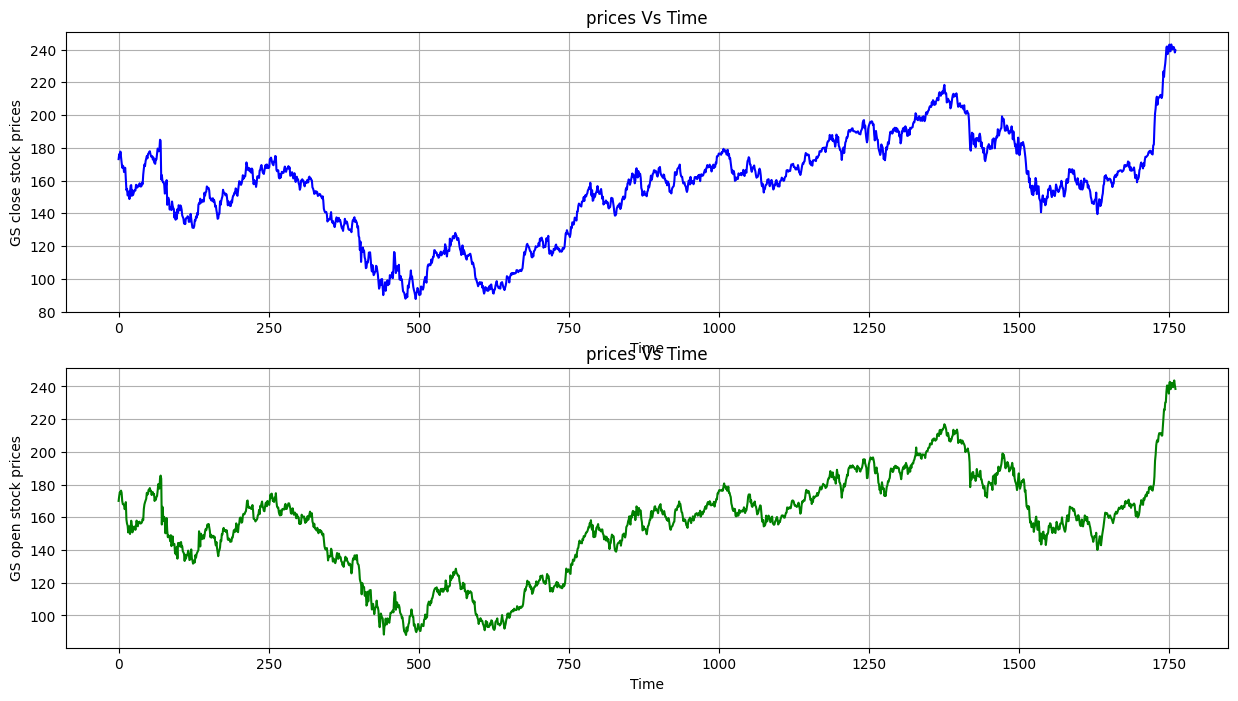

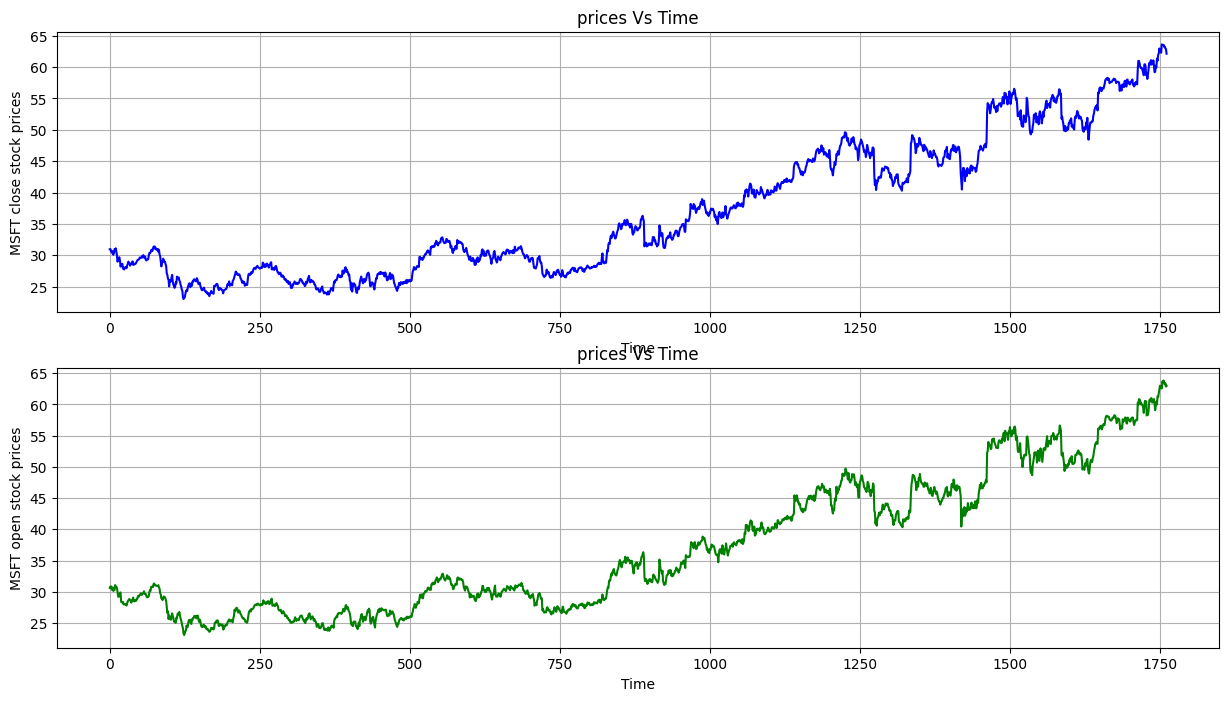

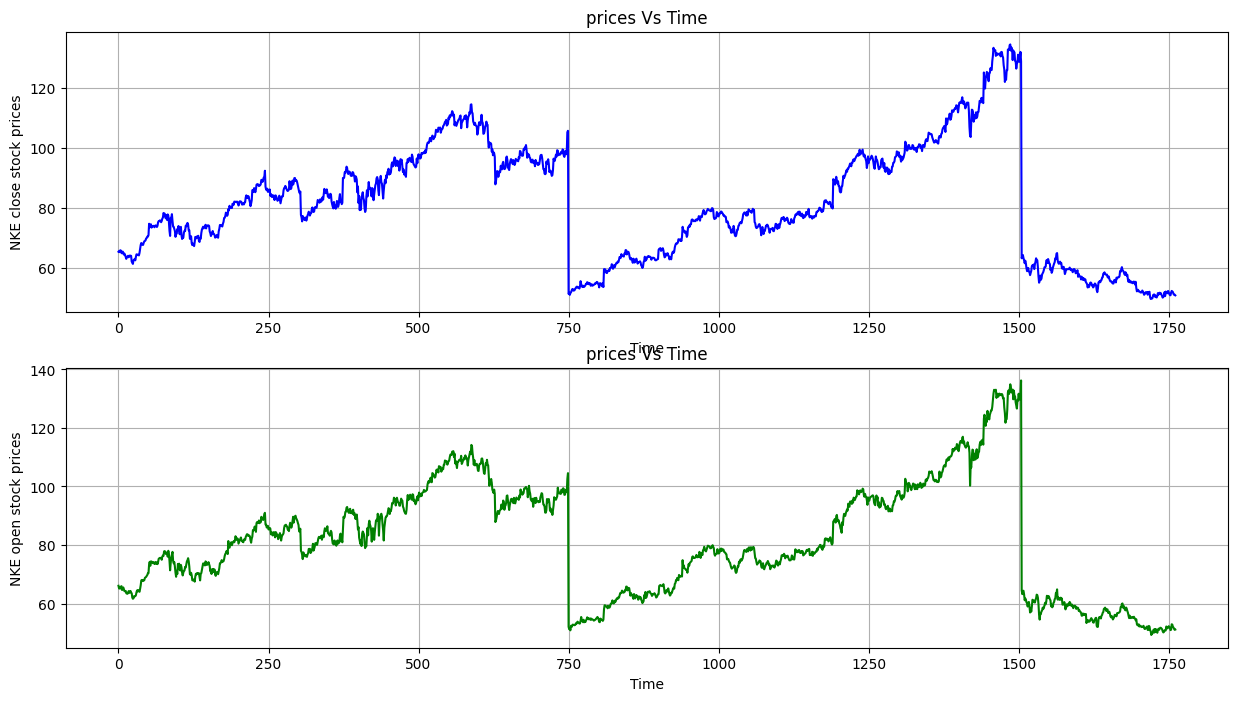

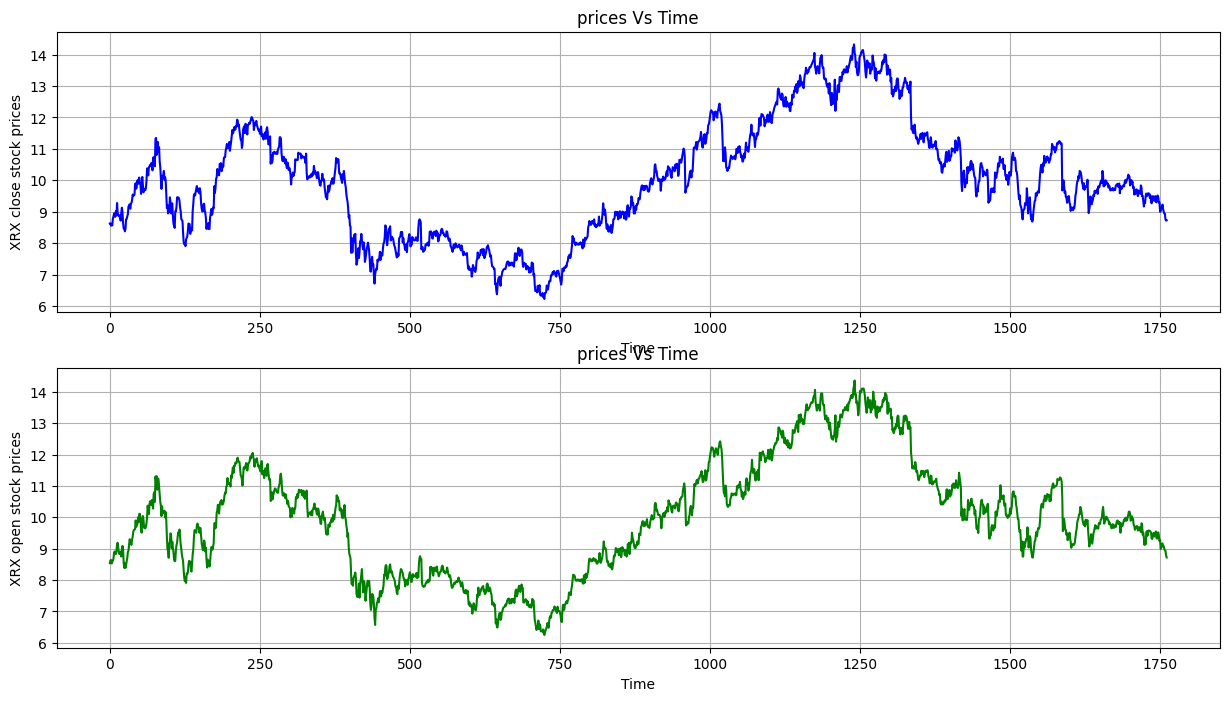

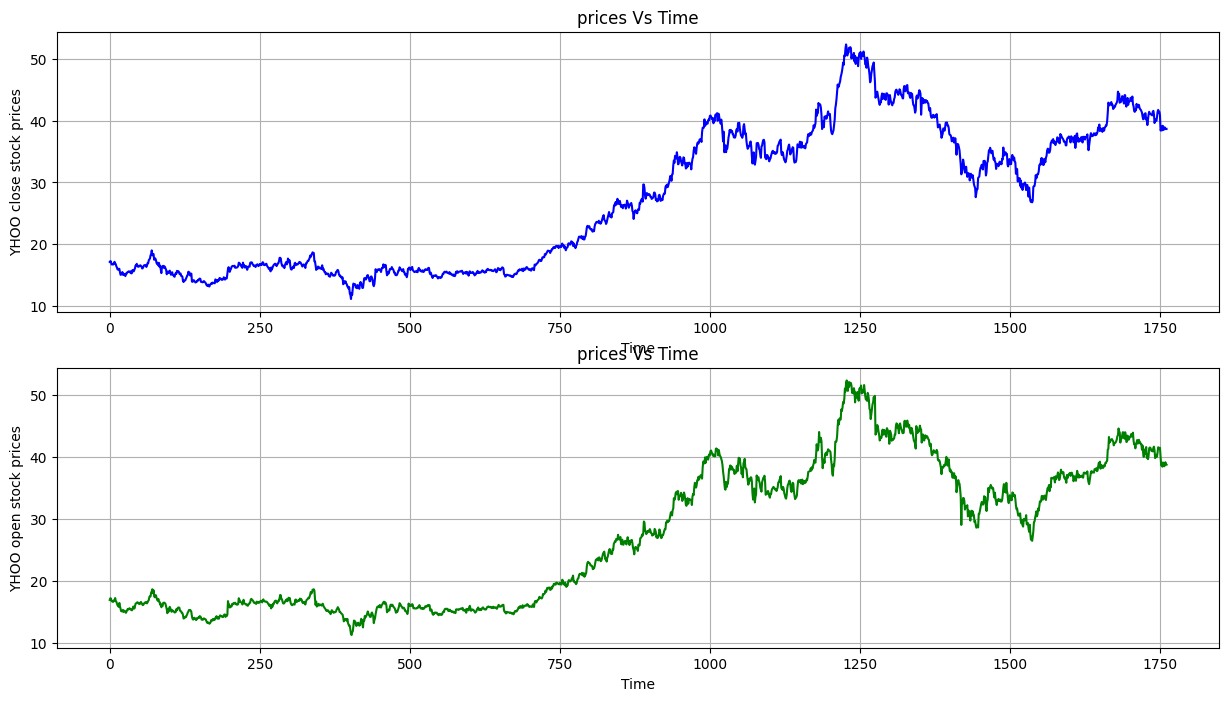

In [205]:
for i in comp_plot:
    plotter(i)


In [206]:
stocks= np.array (df[df.symbol.isin (['YHOO'])].close)
print(stocks)


[17.1      17.23     17.17     ... 38.73     38.639999 38.669998]


In [207]:
display (stocks.shape)

(1762,)

In [208]:
stocks = stocks.reshape(len(stocks) , 1)
print (stocks.shape)
print(stocks)


(1762, 1)
[[17.1     ]
 [17.23    ]
 [17.17    ]
 ...
 [38.73    ]
 [38.639999]
 [38.669998]]


In [209]:
from sklearn.preprocessing import MinMaxScaler
#scaling features between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1)) 
stocks = scaler.fit_transform(stocks) 
display (stocks)


array([[0.14559109],
       [0.14874031],
       [0.14728683],
       ...,
       [0.66957366],
       [0.6673934 ],
       [0.66812012]])

In [210]:
print (stocks.shape) 

(1762, 1)


In [211]:
len(stocks)

1762

In [212]:
train = int(len(stocks) * 0.8)
print (train)


1409


In [213]:
test = len(stocks) - train 
print (test)


353


In [214]:
train = stocks[0:train]
display (train.shape)
print(train)


(1409, 1)

[[0.14559109]
 [0.14874031]
 [0.14728683]
 ...
 [0.63372095]
 [0.61458332]
 [0.61967051]]


In [215]:
test = stocks[len(train) : ]
display(test.shape)
display (test)



(353, 1)

array([[0.63129851],
       [0.60416666],
       [0.56686053],
       [0.6017442 ],
       [0.60925394],
       [0.60586237],
       [0.59593022],
       [0.58381782],
       [0.55741276],
       [0.52906978],
       [0.48982557],
       [0.50024226],
       [0.51913761],
       [0.54748061],
       [0.53415697],
       [0.51235471],
       [0.49685079],
       [0.500969  ],
       [0.51962213],
       [0.49636629],
       [0.47989342],
       [0.4949128 ],
       [0.48594962],
       [0.49273257],
       [0.46584303],
       [0.48328492],
       [0.49200583],
       [0.48062017],
       [0.47601745],
       [0.48643412],
       [0.46778102],
       [0.45179265],
       [0.44210272],
       [0.43701549],
       [0.39995156],
       [0.41593993],
       [0.43168606],
       [0.43168606],
       [0.47529068],
       [0.47868218],
       [0.48134689],
       [0.50339151],
       [0.51550386],
       [0.51913761],
       [0.52737407],
       [0.51477714],
       [0.50872094],
       [0.542

In [216]:
#creating function to create trainX,testX and target(trainY, testY)
def process_data(data , n_features):
    dataX, dataY = [], [] # creating data for dataset and dividing inta X,Y
    for i in range(len(data)-n_features):
        # taking i range from total size- 3 
        a = data[i:(i+n_features), 0]
        # Here a is value of data from i to i+ n_features, ie two values and put it in dataX 
        dataX.append(a) #putting a in dataX
        #here dataY takes the value of data of i + n_features
        dataY.append(data[i + n_features, 0])
        # putting i+ n_features in  dataY
    return np.array(dataX), np.array(dataY)
# returning dataX and dataY in array




In [217]:
n_features = 2
# Here we create train X, Train Y and test X, Test Y data where trainX, testX has two value is each block

trainX, trainY = process_data(train, n_features)
print(trainX.shape , trainY.shape)



(1407, 2) (1407,)


In [218]:
testX, testY = process_data(test, n_features)
print (testX.shape , testY.shape)


(351, 2) (351,)


In [219]:
stocksX, stocksY = process_data(stocks, n_features)
print (stocksX.shape , stocksY.shape)


(1760, 2) (1760,)


In [220]:
display (trainX[:10])

array([[0.14559109, 0.14874031],
       [0.14874031, 0.14728683],
       [0.14728683, 0.13590119],
       [0.13590119, 0.13590119],
       [0.13590119, 0.13687016],
       [0.13687016, 0.13541667],
       [0.13541667, 0.14074613],
       [0.14074613, 0.14607561],
       [0.14607561, 0.13880814],
       [0.13880814, 0.13711241]])

In [221]:
display (trainY[:10])

array([0.14728683, 0.13590119, 0.13590119, 0.13687016, 0.13541667,
       0.14074613, 0.14607561, 0.13880814, 0.13711241, 0.1281492 ])

In [222]:
# reshaping trainX and testX to use in deep learning model
trainX = trainX.reshape(trainX.shape[0] , 1 ,trainX.shape[1])
display (trainX.shape)


(1407, 1, 2)

In [223]:
testX = testX.reshape(testX.shape[0] , 1 ,testX.shape[1])
display (testX.shape)


(351, 1, 2)

In [224]:
stocksX= stocksX.reshape(stocksX.shape[0] , 1 ,stocksX.shape[1])
display (stocksX.shape)


(1760, 1, 2)

In [225]:
# helps us do mathematical operations
import math 
# for setting layers one by one neural layer in model 
from keras.models import sequential 
# types of layers
from keras.layers import Dense , BatchNormalization , Dropout , Activation 
# types of RNN
from keras.layers import LSTM , GRU 
#It puts the data in between given range to set data before putting layer
from sklearn.preprocessing import MinMaxScaler 
# In this method the errors in column is squared and then mean is found 
from sklearn.metrics import mean_squared_error 
# Optimizers used
from tensorflow.keras.optimizers import Adam , SGD , RMSprop


In [226]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [227]:
#Checkpointing the model when required and using other call-backs.
filepath="stock_weights1.hdf5"
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint
# ReduceLROnPlateau- This reduce the learning rate when the matrix stop improving or  too close to reduce overfitting
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_delta=0.0001, patience=1, verbose=1)
#This check point will stop processing, if the model is not improving.
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='max')


In [242]:
from tensorflow.keras.models import Sequential

In [243]:
# creating model for training data using sequential to give series wise output between layers
model = Sequential()
# GRU or Gated Recurrent Unit used for matrix manipulation within Recurrent layer
#This is the input Layer 
model.add(GRU(256 , input_shape = (1 , n_features) , return_sequences=True))
#dropout is used to remove overfitting data on each layer of neural network
model.add(Dropout(0.3))
#Long Short Term Memory is a type of RNN specially used for time series problems
model.add(LSTM(256))
#dropout is used to remove overfitting data on each layer of neural network
model.add(Dropout(0.3))
#Dense layer are fully connected neural networks 
model.add(Dense(64 ,  activation = 'relu'))
#This is the output Layer, Output is only one neuron 
model.add(Dense(1))
#for getting the details of our models
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3 (GRU)                 (None, 1, 256)            199680    
                                                                 
 dropout_6 (Dropout)         (None, 1, 256)            0         
                                                                 
 lstm_3 (LSTM)               (None, 256)               525312    
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                16448     
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 741,505
Trainable params: 741,505
Non-tr

In [244]:
# Selecting the loss measurement metrics and optimizer for our model, to find out mean square error
model.compile(loss='mean_squared_error', optimizer=Adam(lr = 0.0005) , metrics = ['mean_squared_error'])



In [245]:
# fitting the data i.e training the trainX, to relate to trainY
# epochs is the times each data in send to fit
# batch size is the size of information send at a time
# validation_data is the validation or data used for testing 
history = model.fit(trainX, trainY, epochs=100 , batch_size = 128 , 
          callbacks = [checkpoint , lr_reduce] , validation_data = (testX,testY))    

Epoch 1/100
11/11 [==============================] - ETA: 0s - loss: 755.8376 - mean_squared_error: 755.8376
Epoch 1: val_loss improved from 0.17907 to 1315.76270, saving model to stock_weights1.hdf5
11/11 [==============================] - 4s 106ms/step - loss: 755.8376 - mean_squared_error: 755.8376 - val_loss: 1315.7627 - val_mean_squared_error: 1315.7627 - lr: 5.0000e-04
Epoch 2/100
11/11 [==============================] - ETA: 0s - loss: 738.4999 - mean_squared_error: 738.4999
Epoch 2: val_loss did not improve from 1315.76270
11/11 [==============================] - 0s 15ms/step - loss: 738.4999 - mean_squared_error: 738.4999 - val_loss: 1267.8427 - val_mean_squared_error: 1267.8427 - lr: 5.0000e-04
Epoch 3/100
11/11 [==============================] - ETA: 0s - loss: 694.6540 - mean_squared_error: 694.6540
Epoch 3: val_loss did not improve from 1315.76270
11/11 [==============================] - 0s 14ms/step - loss: 694.6540 - mean_squared_error: 694.6540 - val_loss: 1147.5295 - v

Epoch 23/100
11/11 [==============================] - ETA: 0s - loss: 7.0003 - mean_squared_error: 7.0003
Epoch 23: val_loss did not improve from 1315.76270

Epoch 23: ReduceLROnPlateau reducing learning rate to 5.000000332466102e-19.
11/11 [==============================] - 0s 14ms/step - loss: 7.0003 - mean_squared_error: 7.0003 - val_loss: 6.3360 - val_mean_squared_error: 6.3360 - lr: 5.0000e-18
Epoch 24/100
11/11 [==============================] - ETA: 0s - loss: 7.0959 - mean_squared_error: 7.0959
Epoch 24: val_loss did not improve from 1315.76270

Epoch 24: ReduceLROnPlateau reducing learning rate to 5.000000229068525e-20.
11/11 [==============================] - 0s 15ms/step - loss: 7.0959 - mean_squared_error: 7.0959 - val_loss: 6.3360 - val_mean_squared_error: 6.3360 - lr: 5.0000e-19
Epoch 25/100
11/11 [==============================] - ETA: 0s - loss: 7.2329 - mean_squared_error: 7.2329
Epoch 25: val_loss did not improve from 1315.76270

Epoch 25: ReduceLROnPlateau reducing l


Epoch 43: ReduceLROnPlateau reducing learning rate to 5.000000516007281e-39.
11/11 [==============================] - 0s 16ms/step - loss: 7.1740 - mean_squared_error: 7.1740 - val_loss: 6.3360 - val_mean_squared_error: 6.3360 - lr: 5.0000e-38
Epoch 44/100
11/11 [==============================] - ETA: 0s - loss: 7.2334 - mean_squared_error: 7.2334
Epoch 44: val_loss did not improve from 1315.76270

Epoch 44: ReduceLROnPlateau reducing learning rate to 5.000001076526666e-40.
11/11 [==============================] - 0s 15ms/step - loss: 7.2334 - mean_squared_error: 7.2334 - val_loss: 6.3360 - val_mean_squared_error: 6.3360 - lr: 5.0000e-39
Epoch 45/100
11/11 [==============================] - ETA: 0s - loss: 7.4820 - mean_squared_error: 7.4820
Epoch 45: val_loss did not improve from 1315.76270

Epoch 45: ReduceLROnPlateau reducing learning rate to 5.000001076526667e-41.
11/11 [==============================] - 0s 15ms/step - loss: 7.4820 - mean_squared_error: 7.4820 - val_loss: 6.3360 -

Epoch 67/100
11/11 [==============================] - ETA: 0s - loss: 7.5482 - mean_squared_error: 7.5482
Epoch 67: val_loss did not improve from 1315.76270
11/11 [==============================] - 0s 14ms/step - loss: 7.5482 - mean_squared_error: 7.5482 - val_loss: 6.3360 - val_mean_squared_error: 6.3360 - lr: 0.0000e+00
Epoch 68/100
11/11 [==============================] - ETA: 0s - loss: 6.9743 - mean_squared_error: 6.9743
Epoch 68: val_loss did not improve from 1315.76270
11/11 [==============================] - 0s 14ms/step - loss: 6.9743 - mean_squared_error: 6.9743 - val_loss: 6.3360 - val_mean_squared_error: 6.3360 - lr: 0.0000e+00
Epoch 69/100
11/11 [==============================] - ETA: 0s - loss: 7.1599 - mean_squared_error: 7.1599
Epoch 69: val_loss did not improve from 1315.76270
11/11 [==============================] - 0s 14ms/step - loss: 7.1599 - mean_squared_error: 7.1599 - val_loss: 6.3360 - val_mean_squared_error: 6.3360 - lr: 0.0000e+00
Epoch 70/100
11/11 [========

11/11 [==============================] - ETA: 0s - loss: 7.1959 - mean_squared_error: 7.1959
Epoch 92: val_loss did not improve from 1315.76270
11/11 [==============================] - 0s 14ms/step - loss: 7.1959 - mean_squared_error: 7.1959 - val_loss: 6.3360 - val_mean_squared_error: 6.3360 - lr: 0.0000e+00
Epoch 93/100
11/11 [==============================] - ETA: 0s - loss: 7.1907 - mean_squared_error: 7.1907
Epoch 93: val_loss did not improve from 1315.76270
11/11 [==============================] - 0s 14ms/step - loss: 7.1907 - mean_squared_error: 7.1907 - val_loss: 6.3360 - val_mean_squared_error: 6.3360 - lr: 0.0000e+00
Epoch 94/100
11/11 [==============================] - ETA: 0s - loss: 7.1279 - mean_squared_error: 7.1279
Epoch 94: val_loss did not improve from 1315.76270
11/11 [==============================] - 0s 14ms/step - loss: 7.1279 - mean_squared_error: 7.1279 - val_loss: 6.3360 - val_mean_squared_error: 6.3360 - lr: 0.0000e+00
Epoch 95/100
11/11 [=====================

In [246]:

test_pred = model.predict(testX)
display (test_pred [:10])


array([[34.372017],
       [33.316704],
       [33.310005],
       [33.9907  ],
       [34.052742],
       [33.832836],
       [33.471397],
       [32.830597],
       [31.918898],
       [30.775011]], dtype=float32)

In [247]:
test_pred = scaler.inverse_transform(test_pred)
display (test_pred [:10])


array([[1429.9668],
       [1386.4036],
       [1386.127 ],
       [1414.2261],
       [1416.7872],
       [1407.7095],
       [1392.7893],
       [1366.337 ],
       [1328.702 ],
       [1281.4824]], dtype=float32)

In [248]:
testY = testY.reshape(testY.shape[0] , 1)
#Converting reshaped list in 1D array so that it will be efficient in plotting
testY = scaler.inverse_transform(testY)
# taking testY from 1 to 10
display (testY[:10])


array([[1434.83724807],
       [1494.28036407],
       [1507.07724632],
       [1501.29788134],
       [1484.37312303],
       [1463.73312353],
       [1418.73788334],
       [1370.44036707],
       [1303.56672741],
       [1321.31716826]])

In [249]:
from sklearn.metrics import r2_score
r2_score(testY,test_pred)


0.6720692559814164

Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices


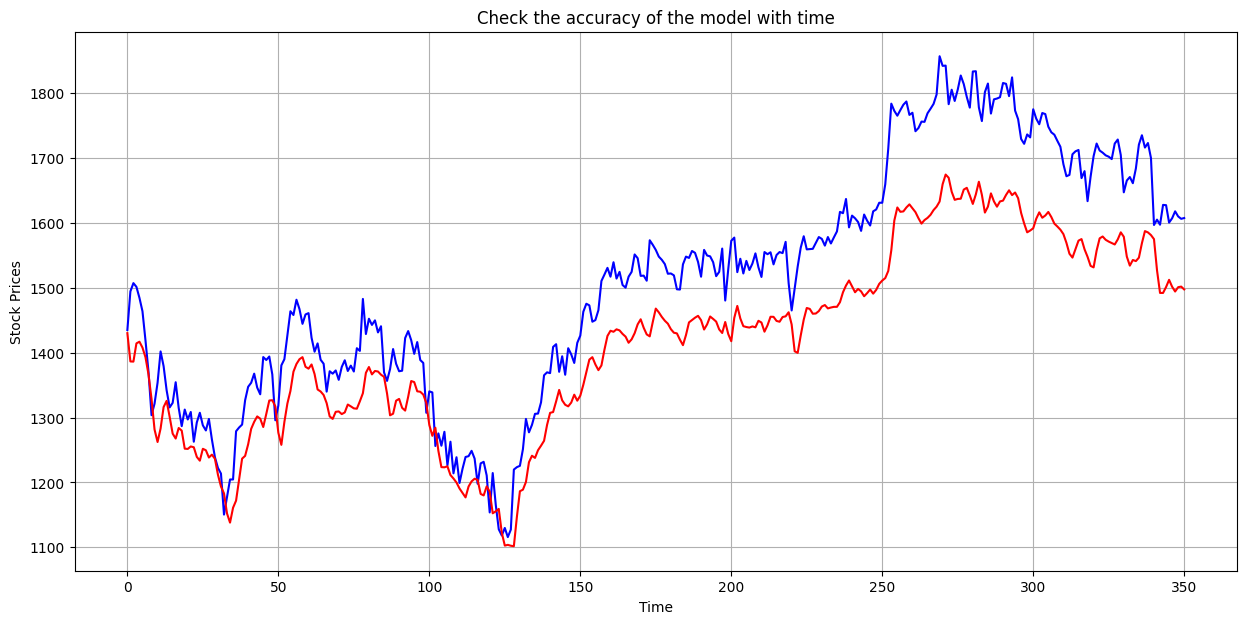

In [250]:
# Ploting the graph of stock prices with time
print("Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices")
plt.rcParams["figure.figsize"] = (15,7)
# testY is the blue line
plt.plot(testY , 'b')
# pred is the red line
plt.plot(test_pred , 'r')
# Setting x axis as time
plt.xlabel('Time')
# Setting y axis as stock prices
plt.ylabel('Stock Prices')
# setting title 
plt.title('Check the accuracy of the model with time')
# enabling grids in graph 
plt.grid(True)
# it call the graph with labels, titles, lines
plt.show()

In [251]:
train_pred = model.predict(trainX)
train_pred = scaler.inverse_transform(train_pred)
trainY = trainY.reshape(trainY.shape[0] , 1)
trainY = scaler.inverse_transform(trainY)
print ('Display Accuracy Training Data')
display (r2_score(trainY,train_pred))


Display Accuracy Training Data


0.9634704987658365

Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices


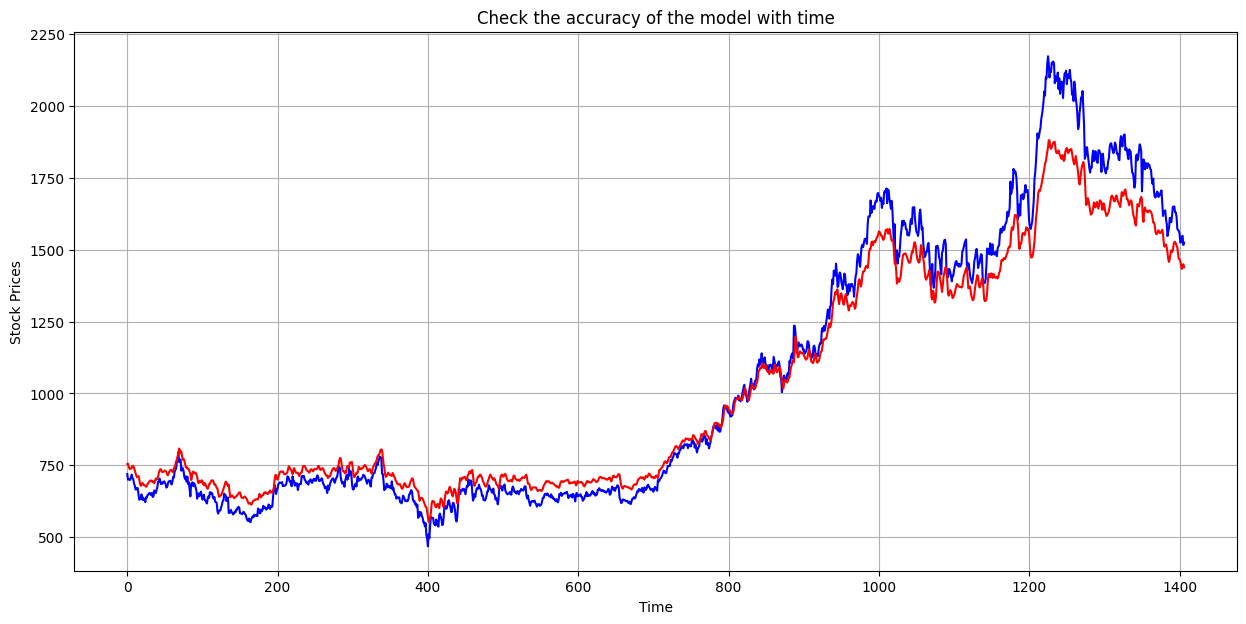

In [252]:
# Ploting the graph of stock prices with time - Training Data
print("Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices")
plt.rcParams["figure.figsize"] = (15,7)
plt.plot(trainY  , 'b')
plt.plot(train_pred, 'r')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Check the accuracy of the model with time')
plt.grid(True)
plt.show()



In [253]:
stocks_pred = model.predict(stocksX)
stocks_pred = scaler.inverse_transform(stocks_pred)
stocksY = stocksY.reshape(stocksY.shape[0] , 1)
stocksY = scaler.inverse_transform(stocksY)
print ('Display Accuracy Training Data')
display (r2_score(stocksY,stocks_pred))


Display Accuracy Training Data


0.960466895543748

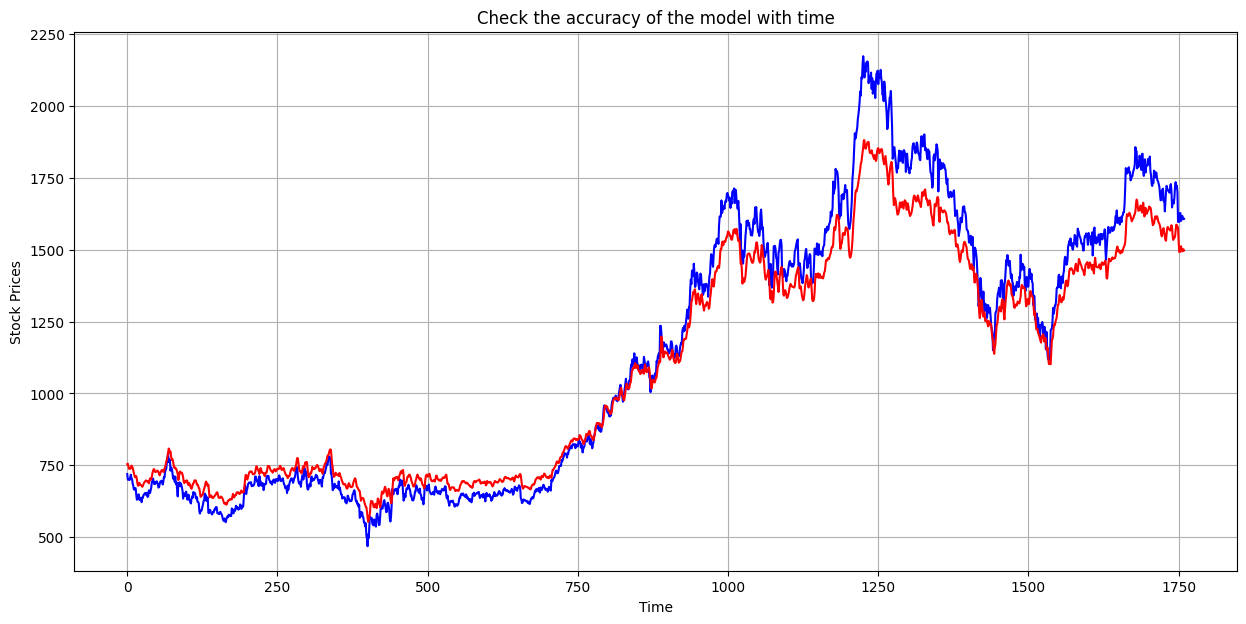

In [254]:
plt.rcParams["figure.figsize"] = (15,7)
plt.plot(stocksY  , 'b')
plt.plot(stocks_pred, 'r')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Check the accuracy of the model with time')
plt.grid(True)
plt.show()


In [257]:
# Extract the data related to company - YHOO
results= df[df.symbol.isin (['YHOO'])]
# Update the data frame starting with 2nd records , since first prediction is for 2nd record
results= results [2:]
# Reset the index 0, 1,2 etc
results = results.reset_index(drop=True)
# Convert Predicted Value to Data Frame
df_stocks_pred= pd.DataFrame(stocks_pred, columns = ['Close_Prediction'])
# Concat Original and prediction data
results= pd.concat([results,df_stocks_pred],axis =1)
results.to_excel('results.xlsx')
display(results)


,date,symbol,open,close,low,high,volume,Close_Prediction
0,2010-01-06,YHOO,17.170000,17.170000,17.070000,17.299999,16422000.0,754.497009
1,2010-01-07,YHOO,16.809999,16.700001,16.570000,16.900000,31816300.0,755.641785
2,2010-01-08,YHOO,16.680000,16.700001,16.620001,16.760000,15470000.0,746.021912
3,2010-01-11,YHOO,16.770000,16.740000,16.480000,16.830000,16181900.0,737.931763
4,2010-01-12,YHOO,16.650000,16.680000,16.600000,16.860001,15672400.0,738.661438
...,...,...,...,...,...,...,...,...
1755,2016-12-23,YHOO,38.459999,38.660000,38.369999,38.810001,3840100.0,1501.520874
1756,2016-12-27,YHOO,38.590000,38.919998,38.500000,39.070000,4240300.0,1494.151733
1757,2016-12-28,YHOO,39.119999,38.730000,38.709999,39.220001,4393500.0,1500.815918
1758,2016-12-29,YHOO,38.759998,38.639999,38.480000,38.930000,4170200.0,1501.721558
